# Prep

In [1]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)
default_figure_size = (6.4, 4.8)

In [2]:
# data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

## Get all_data

In [3]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data_raw.csv'), index_col=0)
all_data

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (65,66) have mixed types.Specify dtype option on import or set low_memory=False.


,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,bool_middle_item_lowRulesTransferOnly,bool_unlocked_star_highRulesBoth,bool_unlocked_star_highRulesLearnOnly,bool_unlocked_star_highRulesTransferOnly,log_rt,bool_middle_item,bool_star,acc,middle_item_not,middle_item_both
0,797.865,0.0,85.0,learning,297.0,2422963.0,0.0-77.0-0.0,high,0.0,0.0,...,0.0,0.0,0.0,0.0,6.683192,False,False,0.0,NaN,NaN
1,654.720,0.0,73.0,learning,298.0,2423619.0,0.0-77.0-1.0,high,0.0,0.0,...,0.0,0.0,0.0,0.0,6.485734,True,False,0.0,NaN,0.0
2,1317.900,0.0,79.0,learning,299.0,2424938.0,0.0-77.0-2.0,high,0.0,0.0,...,0.0,0.0,0.0,0.0,7.184553,False,False,0.0,NaN,NaN
3,276.305,0.0,80.0,learning,300.0,2425216.0,0.0-77.0-3.0,high,0.0,0.0,...,0.0,0.0,0.0,0.0,5.625118,False,False,0.0,7.0,7.0
4,823.310,0.0,85.0,learning,302.0,2426546.0,0.0-78.0-0.0,high,0.0,1.0,...,0.0,0.0,0.0,0.0,6.714547,False,False,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251104,NaN,NaN,NaN,learning,NaN,NaN,NaN,low,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251105,NaN,NaN,NaN,learning,NaN,NaN,NaN,low,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251106,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251107,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Get demographics questionnaire

In [4]:
demographics = pd.read_csv(os.path.join(data_dir, 'Demographics.csv'), header=1)
demographics = demographics.rename(columns={'id': 'sid'})
demographics.sid = demographics.sid.astype('int')
demographics

,sid,Start Date,End Date,Duration (in seconds),Recorded Date,Response ID,sex,age (years),age (months),ethnicity,...,"If yes, please specify:",drug abuse,alcoholism,prescription medication,"If so, please provide the specific medications and doses:",over the counter medication,"If so, please provide the specific medications and doses:.1",head trauma/neurological disorder,"If so, please describe below:",cond
0,11311,7/15/2020 1:37:54,7/15/2020 1:39:17,82,7/15/2020 1:39:18,R_1mkqn7XYRiZ11Kl,Female,19.0,6.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
1,31309,7/15/2020 10:08:00,7/15/2020 10:08:52,51,7/15/2020 10:08:52,R_1NUxGUE5Kz1Ws8N,Female,19.0,2.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
2,31309,7/15/2020 10:16:23,7/15/2020 10:16:42,19,7/15/2020 10:16:42,R_3gMjRx6S0Iz0Jxn,Female,19.0,2.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
3,36766,7/15/2020 10:19:57,7/15/2020 10:20:57,60,7/15/2020 10:20:58,R_bPcZwHcFFtCfmp3,Female,22.0,8.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
4,19774,7/15/2020 12:04:27,7/15/2020 12:06:24,117,7/15/2020 12:06:25,R_CkVhwlQeFfPQMUN,Female,20.0,11.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,39514,9/25/2020 5:01:01,9/25/2020 5:02:12,70,9/25/2020 5:02:12,R_3j1XA5biS493Ykk,Female,19.0,7.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
96,31684,9/25/2020 8:05:44,9/25/2020 8:22:26,1001,9/25/2020 8:22:26,R_XvPVJpVkv2ar9gB,Female,19.0,2.0,Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
97,35386,9/25/2020 9:39:07,9/25/2020 9:44:00,292,9/25/2020 9:44:00,R_3P5emuLBkmpk3Rc,Female,20.0,7.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
98,27517,9/25/2020 13:20:30,9/25/2020 13:21:38,68,9/25/2020 13:21:38,R_xyFysqf8fWrqifD,Female,20.0,2.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp


In [5]:
# Subset participants of current dataset
demo = demographics.loc[demographics['sid'].isin(np.unique(all_data['sid']))].reset_index(drop=True)
demo

,sid,Start Date,End Date,Duration (in seconds),Recorded Date,Response ID,sex,age (years),age (months),ethnicity,...,"If yes, please specify:",drug abuse,alcoholism,prescription medication,"If so, please provide the specific medications and doses:",over the counter medication,"If so, please provide the specific medications and doses:.1",head trauma/neurological disorder,"If so, please describe below:",cond
0,36718,7/21/2020 23:04:51,7/21/2020 23:05:55,64,7/21/2020 23:05:55,R_2TyKkuQLWfoRxTD,Female,18.0,1.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
1,36790,7/22/2020 1:22:07,7/22/2020 1:24:05,118,7/22/2020 1:24:06,R_9poSkvJvE0yqOMV,Female,19.0,0.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
2,36913,7/22/2020 3:04:40,7/22/2020 3:07:03,143,7/22/2020 3:07:04,R_xcjv9I3pczlGch3,Female,18.0,9.0,Hispanic or Latino,...,NaN,No,No,No,NaN,Yes,cold medicine,No,NaN,rpp
3,36865,7/22/2020 22:23:30,7/22/2020 22:24:56,85,7/22/2020 22:24:56,R_2bIyyeA4QD3myIB,Female,19.0,4.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
4,14239,7/22/2020 22:50:37,7/22/2020 22:51:47,70,7/22/2020 22:51:47,R_1ih67IqGsaXuVh8,Female,21.0,1.0,Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,39514,9/25/2020 5:01:01,9/25/2020 5:02:12,70,9/25/2020 5:02:12,R_3j1XA5biS493Ykk,Female,19.0,7.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
62,31684,9/25/2020 8:05:44,9/25/2020 8:22:26,1001,9/25/2020 8:22:26,R_XvPVJpVkv2ar9gB,Female,19.0,2.0,Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
63,35386,9/25/2020 9:39:07,9/25/2020 9:44:00,292,9/25/2020 9:44:00,R_3P5emuLBkmpk3Rc,Female,20.0,7.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp
64,27517,9/25/2020 13:20:30,9/25/2020 13:21:38,68,9/25/2020 13:21:38,R_xyFysqf8fWrqifD,Female,20.0,2.0,NOT Hispanic or Latino,...,NaN,No,No,No,NaN,No,NaN,No,NaN,rpp


In [6]:
# Remove duplicate entries
already_ids = []

for i, sid in enumerate(demo['sid']):
    if sid in already_ids:
        print("Removing duplicate entry for participant {}.".format(sid))
        demo = demo.drop(i)
    already_ids += [sid]
demo = demo.reset_index(drop=True)
demo.shape

Removing duplicate entry for participant 36826.
Removing duplicate entry for participant 31306.
Removing duplicate entry for participant 38389.
Removing duplicate entry for participant 38389.
Removing duplicate entry for participant 38389.
Removing duplicate entry for participant 31552.


(60, 31)

## Get strategy questionnaire

In [7]:
strategies = pd.read_csv(os.path.join(data_dir, 'StrategyQuestionnaire.csv'), header=1)
strategies = strategies[1:]  # Remove first row with "ImportId":"startDate","timeZone":"Ameri, ...
strategies = strategies.rename(columns={'id': 'sid'})
strategies.sid = strategies.sid.astype('int')
strategies

,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Did the rules change about halfway through the first machine?,Did the rules change about halfway through the second machine?,How did the rules change for the first machine?,How did the rules change for the second machine?,Which hand did you use to play the first machine?,Which hand did you use to play the second machine?,"Did you use pen and paper or any other external device (e.g., cell phone) to help in this task? E.g., some people write down keys to help them memorize and perform better.",How did you use the device? Describe your strategy.,Is there anything you'd like to tell us?,sid
1,2020-07-21 23:47:39,2020-07-21 23:51:49,IP Address,100,250,True,2020-07-21 23:51:49,R_3RgznnDB2GI0inn,anonymous,EN,...,"Yes, rules changed","No, rules did not change",The keys make different tools after I reach 10...,The rule didn't change.,Left hand,Right hand,NaN,NaN,NaN,36718
2,2020-07-22 02:00:46,2020-07-22 02:11:05,IP Address,100,619,True,2020-07-22 02:11:05,R_22WwgydALqTXYAc,anonymous,EN,...,"Yes, rules changed","Yes, rules changed",Keys for two of the four elements changed. But...,The 2 elements required for 2 of the four star...,Left hand,Right hand,NaN,NaN,Interesting game.,36790
3,2020-07-22 03:49:40,2020-07-22 03:53:04,IP Address,100,204,True,2020-07-22 03:53:04,R_3lGspaZBXZEB1ps,anonymous,EN,...,"Yes, rules changed","Yes, rules changed",I wasn't able to solve it.,The combinations for 2 colors changed. I'm ass...,Right hand,Both hands,NaN,NaN,NaN,36913
4,2020-07-22 23:03:55,2020-07-22 23:11:40,IP Address,100,464,True,2020-07-22 23:11:40,R_3n8kSw1DetuSs9O,anonymous,EN,...,"Yes, rules changed","No, rules did not change",The keys to make some of the symbols were diff...,I don't think they changed from my knowledge o...,Right hand,Left hand,NaN,NaN,I am not very good at typing (I am mainly a tw...,36865
5,2020-07-22 23:28:13,2020-07-22 23:30:15,IP Address,100,122,True,2020-07-22 23:30:15,R_3gXVQincJIocSC1,anonymous,EN,...,"Yes, rules changed","No, rules did not change",It seemed that different patterns were going t...,I don't think the rules changed for the second...,Both hands,Both hands,NaN,NaN,nope!,14239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020-09-25 16:08:50,2020-09-25 16:12:36,IP Address,100,226,True,2020-09-25 16:12:37,R_3jyFBxA8gun82ch,anonymous,EN,...,"Yes, rules changed","Yes, rules changed",The reason I believe these rules changed was b...,I believe the combination of tools changed for...,Right hand,Left hand,"No, I did not use any external device to help ...",NaN,NaN,26899
72,2020-10-16 21:52:44,2020-10-16 21:56:22,IP Address,100,217,True,2020-10-16 21:56:22,R_wXgV5uvHsv2y6Up,anonymous,EN,...,"Yes, rules changed","No, rules did not change",I think the rule for the saw changed (though I...,I don't think they changed.,Both hands,Both hands,"No, I did not use any external device to help ...",NaN,This was a really interesting study to do!,28192
73,2020-10-16 22:33:26,2020-10-16 22:37:31,IP Address,100,245,True,2020-10-16 22:37:31,R_RKx2c6V8vzaCqlz,anonymous,EN,...,"No, rules did not change","No, rules did not change","I don't think it change...? If it did, i did n...",I dont think it change...? I didnt focus on th...,Right hand,Left hand,"No, I did not use any external device to help ...",NaN,"This was hard, I still do not know how I creat...",15670
74,2020-10-17 02:49:01,2020-10-17 02:50:03,IP Address,100,61,True,2020-10-17 02:50:03,R_0Jl1l1BWC8hvURz,anonymous,EN,...,"No, rules did not change","No, rules did not change",did not notice,did not notice,Right hand,Left hand,"No, I did not use any external device to help ...",i didnt,NaN,39925


In [8]:
# Subset participants of current dataset
strat = strategies.loc[strategies['sid'].isin(np.unique(all_data['sid']))].reset_index(drop=True)
strat

,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Did the rules change about halfway through the first machine?,Did the rules change about halfway through the second machine?,How did the rules change for the first machine?,How did the rules change for the second machine?,Which hand did you use to play the first machine?,Which hand did you use to play the second machine?,"Did you use pen and paper or any other external device (e.g., cell phone) to help in this task? E.g., some people write down keys to help them memorize and perform better.",How did you use the device? Describe your strategy.,Is there anything you'd like to tell us?,sid
0,2020-07-21 23:47:39,2020-07-21 23:51:49,IP Address,100,250,True,2020-07-21 23:51:49,R_3RgznnDB2GI0inn,anonymous,EN,...,"Yes, rules changed","No, rules did not change",The keys make different tools after I reach 10...,The rule didn't change.,Left hand,Right hand,NaN,NaN,NaN,36718
1,2020-07-22 02:00:46,2020-07-22 02:11:05,IP Address,100,619,True,2020-07-22 02:11:05,R_22WwgydALqTXYAc,anonymous,EN,...,"Yes, rules changed","Yes, rules changed",Keys for two of the four elements changed. But...,The 2 elements required for 2 of the four star...,Left hand,Right hand,NaN,NaN,Interesting game.,36790
2,2020-07-22 03:49:40,2020-07-22 03:53:04,IP Address,100,204,True,2020-07-22 03:53:04,R_3lGspaZBXZEB1ps,anonymous,EN,...,"Yes, rules changed","Yes, rules changed",I wasn't able to solve it.,The combinations for 2 colors changed. I'm ass...,Right hand,Both hands,NaN,NaN,NaN,36913
3,2020-07-22 23:03:55,2020-07-22 23:11:40,IP Address,100,464,True,2020-07-22 23:11:40,R_3n8kSw1DetuSs9O,anonymous,EN,...,"Yes, rules changed","No, rules did not change",The keys to make some of the symbols were diff...,I don't think they changed from my knowledge o...,Right hand,Left hand,NaN,NaN,I am not very good at typing (I am mainly a tw...,36865
4,2020-07-22 23:28:13,2020-07-22 23:30:15,IP Address,100,122,True,2020-07-22 23:30:15,R_3gXVQincJIocSC1,anonymous,EN,...,"Yes, rules changed","No, rules did not change",It seemed that different patterns were going t...,I don't think the rules changed for the second...,Both hands,Both hands,NaN,NaN,nope!,14239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2020-09-25 13:51:43,2020-09-25 13:52:29,IP Address,100,45,True,2020-09-25 13:52:29,R_2WJCd9CKAL1fZqi,anonymous,EN,...,"Yes, rules changed","No, rules did not change",NaN,NaN,Right hand,Left hand,"No, I did not use any external device to help ...",NaN,NaN,27517
59,2020-09-25 16:08:50,2020-09-25 16:12:36,IP Address,100,226,True,2020-09-25 16:12:37,R_3jyFBxA8gun82ch,anonymous,EN,...,"Yes, rules changed","Yes, rules changed",The reason I believe these rules changed was b...,I believe the combination of tools changed for...,Right hand,Left hand,"No, I did not use any external device to help ...",NaN,NaN,26899
60,2020-10-16 21:52:44,2020-10-16 21:56:22,IP Address,100,217,True,2020-10-16 21:56:22,R_wXgV5uvHsv2y6Up,anonymous,EN,...,"Yes, rules changed","No, rules did not change",I think the rule for the saw changed (though I...,I don't think they changed.,Both hands,Both hands,"No, I did not use any external device to help ...",NaN,This was a really interesting study to do!,28192
61,2020-10-16 22:33:26,2020-10-16 22:37:31,IP Address,100,245,True,2020-10-16 22:37:31,R_RKx2c6V8vzaCqlz,anonymous,EN,...,"No, rules did not change","No, rules did not change","I don't think it change...? If it did, i did n...",I dont think it change...? I didnt focus on th...,Right hand,Left hand,"No, I did not use any external device to help ...",NaN,"This was hard, I still do not know how I creat...",15670


# Exclude Participants

In [9]:
min_points_chance_performer = 25
max_missed_trials_inattentive = 40

## Psychological disorder, head trauma

In [10]:
psych_sids = demo.loc[demo['mental/psychiatric illness diagnosis'] == 'Yes', 'sid'].values
trauma_sids = demo.loc[demo['head trauma/neurological disorder'] == 'Yes', 'sid'].values

psych_sids, trauma_sids

(array([35437, 32713]), array([31552, 23638]))

## Bad performance

In [11]:
# Add chance performer column to all_data
id_cols = ['sid', 'phase', 'trial_type']
chance_performers1 = all_data.groupby(id_cols).aggregate('mean')['points'].reset_index()
chance_performers1 = chance_performers1.groupby(['sid']).aggregate('count')['phase'].reset_index()
chance_performers1

,sid,phase
0,13885,4
1,14239,4
2,15670,4
3,16849,4
4,23638,4
...,...,...
58,39139,4
59,39304,4
60,39508,4
61,39514,4


In [12]:
chance_performers2 = all_data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + ['acc']]
chance_performers2['points'] = chance_performers2['acc'] * (np.max(all_data.trial_) + 1)
chance_performers2

,sid,phase,trial_type,acc,points
0,13885,high,learning,0.423333,127.000000
1,13885,high,transfer,0.402010,120.603015
2,13885,low,learning,0.496667,149.000000
3,13885,low,transfer,0.542714,162.814070
4,14239,high,learning,0.208054,62.416107
...,...,...,...,...,...
247,39514,low,transfer,0.329843,98.952880
248,39520,high,learning,0.318792,95.637584
249,39520,high,transfer,0.255000,76.500000
250,39520,low,learning,0.600671,180.201342


In [13]:
chance_performers = set(
    list(chance_performers1.loc[chance_performers1['phase'] == 1, 'sid']) + \
    list(set(chance_performers2.loc[
        (chance_performers2.trial_type == 'learning') & 
        (chance_performers2.points < min_points_chance_performer), 'sid']))
)

print("Chance performer ids: {}".format(chance_performers))

Chance performer ids: {24964, 31684, 31306, 36880, 27517, 14239}


## Too many missed trials

In [14]:
d = all_data.loc[np.isnan(all_data['key_press'])].groupby(['sid']).aggregate('sum').reset_index()[['sid', 'timeout']]

inattentives = d.loc[d['timeout'] > max_missed_trials_inattentive].sid.values

print("Inattentive participant ids: {}".format(inattentives))

Inattentive participant ids: [31306 31684 37552 39139 39514]


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\01_ChancePerformers.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.


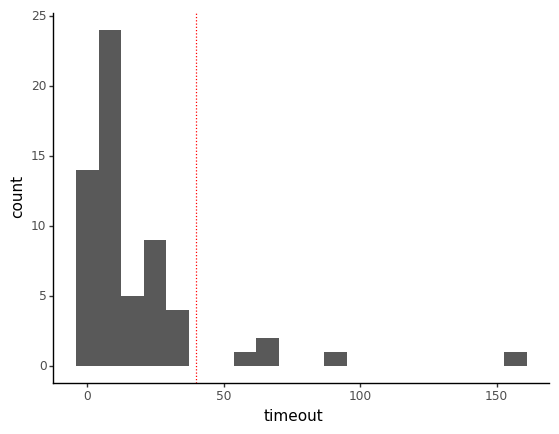

<ggplot: (118177722055)>


In [15]:
g = (gg.ggplot(d, gg.aes('timeout'))
 + gg.geom_histogram(position=gg.position_dodge(width=4))
 + gg.geom_vline(xintercept=max_missed_trials_inattentive, linetype='dotted', color='red')
)
g.save(os.path.join(plot_dir, '01_ChancePerformers.png'))
print(g)

In [16]:
num_dat = all_data.loc[all_data['phase'] == 'low'].groupby(['sid', 'phaseNum']).aggregate('mean').reset_index()[['sid', 'phaseNum']]

print('Before Excluding: High transfer first: n={}; low transfer first: n={}'.format(
    np.sum(num_dat['phaseNum'] == 0), np.sum(num_dat['phaseNum'] == 1)))

Before Excluding: High transfer first: n=26; low transfer first: n=37


## Using pen and paper

In [17]:
pen_paper_q = 'Did you use pen and paper or any other external device (e.g., cell phone) to help in this task? E.g., some people write down keys to help them memorize and perform better.'
yes_ans = 'Yes, I used an external device to help (pen & paper, cell phone, etc.).'
no_ans = 'No, I did not use any external device to help with the task.'

pen_paper_sids = strat.loc[strat[pen_paper_q] == yes_ans, 'sid'].values
pen_paper_sids

array([37348, 26770, 39139, 37552, 31951, 38377, 39514, 31684, 37036])

In [18]:
pen_paper_q2 = 'How did you use the device? Describe your strategy.'
for i, sid in enumerate(pen_paper_sids):
    print(sid, strat.loc[strat[pen_paper_q] == yes_ans, pen_paper_q2].reset_index(drop=True)[i])

37348 i wrote down the letters that formed the correct star/color/etc and if it changed halfway, then i would find the new one and write it down
26770 nan
39139 I wrote down on a piece of paper which two letters would make a specific tool.
37552 For the first machine, my notes were all over the place and not very helpful.  For the second machine, I wrote down all possible combinations of two letters so I could save time thinking of them while performing the task.  Once I found a star color, even if it wasn't the one I was looking for, I wrote the combination down with the name of the star's color.  Finally, when the rules changed, I wrote the changed combinations over the original combinations.
31951 nan
38377 nan
39514 I wrote down all of the possible letter combinations and I went through the list several times, trying to figure out any color combo. Anytime I figured out a color combination, I wrote it down so I could refer to it later. 
31684 I wrote down the keyboard letters I used

# Remove participants

In [19]:
all_data['chance_performer'] = all_data['sid'].isin(chance_performers)
all_data['inattentives'] = all_data['sid'].isin(inattentives)
all_data['psych_disorder'] = all_data['sid'].isin(psych_sids)
all_data['head_trauma'] = all_data['sid'].isin(trauma_sids)
all_data['pen_paper'] = all_data['sid'].isin(pen_paper_sids)

In [20]:
all_data = all_data.loc[
    np.invert(all_data['inattentives'] | all_data['psych_disorder'] | all_data['head_trauma'] | all_data['pen_paper'])
].drop(columns=['inattentives', 'psych_disorder', 'head_trauma', 'pen_paper'])
all_data

,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,bool_unlocked_star_highRulesBoth,bool_unlocked_star_highRulesLearnOnly,bool_unlocked_star_highRulesTransferOnly,log_rt,bool_middle_item,bool_star,acc,middle_item_not,middle_item_both,chance_performer
0,797.865,0.0,85.0,learning,297.0,2422963.0,0.0-77.0-0.0,high,0.0,0.0,...,0.0,0.0,0.0,6.683192,False,False,0.0,NaN,NaN,False
1,654.720,0.0,73.0,learning,298.0,2423619.0,0.0-77.0-1.0,high,0.0,0.0,...,0.0,0.0,0.0,6.485734,True,False,0.0,NaN,0.0,False
2,1317.900,0.0,79.0,learning,299.0,2424938.0,0.0-77.0-2.0,high,0.0,0.0,...,0.0,0.0,0.0,7.184553,False,False,0.0,NaN,NaN,False
3,276.305,0.0,80.0,learning,300.0,2425216.0,0.0-77.0-3.0,high,0.0,0.0,...,0.0,0.0,0.0,5.625118,False,False,0.0,7.0,7.0,False
4,823.310,0.0,85.0,learning,302.0,2426546.0,0.0-78.0-0.0,high,0.0,1.0,...,0.0,0.0,0.0,6.714547,False,False,0.0,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251104,NaN,NaN,NaN,learning,NaN,NaN,NaN,low,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
251105,NaN,NaN,NaN,learning,NaN,NaN,NaN,low,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
251106,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
251107,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# Demographics

In [21]:
print('Number of Females: {}; Males: {}; Decline to answer: {}'.format(
    np.sum(demo['sex'] == "Female"), np.sum(demo['sex'] == "Male"), np.sum(demo['sex'] == "Decline to answer")
))

Number of Females: 49; Males: 10; Decline to answer: 1


In [22]:
num_dat = all_data.loc[all_data['phase'] == 'low'].groupby(['sid', 'phaseNum']).aggregate('mean').reset_index()[['sid', 'phaseNum']]

print('After Excluding: High transfer first: n={}; low transfer first: n={}'.format(
    np.sum(num_dat['phaseNum'] == 0), np.sum(num_dat['phaseNum'] == 1)))

After Excluding: High transfer first: n=19; low transfer first: n=30


## Save data

In [23]:
all_data.to_csv(os.path.join(data_dir, 'all_data.csv'))